## Testbook.ipynb
This notebook is a breakdown of the image to schematic function step-by-step for R&D.



In [17]:
# Import the file containing the functions to convert images to schematics
import scripts.image_to_schematic as convUtils


### Convert image to JSON using an LLM
Currently supported: Gemini, GPT4-Vision

[chain/start] [1:chain:RunnableSequence] Entering Chain run with input:
{
  "image_path": "testImages/battery_RC_Trial.png",
  "prompt": "\n   Given the image which contains a circuit schematic drawing, provide the following information:\n   - A list of components present on this schematic drawing, including their name in lowercase alphabet (like resistor, capacitor, switch etc), position in the image in RELATIVE coordinates assuming each component is one cell/pixel, and orientation (you may approximate using pixel locations)\n   - A list of connections made by the components, you must make sure all the referneces stays consistent throught your answer!\n   Please just reply ONLY in JSON output and nothing else!\n   "
}
[chain/start] [1:chain:RunnableSequence > 2:chain:TransformChain] Entering Chain run with input:
{
  "image_path": "testImages/battery_RC_Trial.png",
  "prompt": "\n   Given the image which contains a circuit schematic drawing, provide the following information:\n   - A 
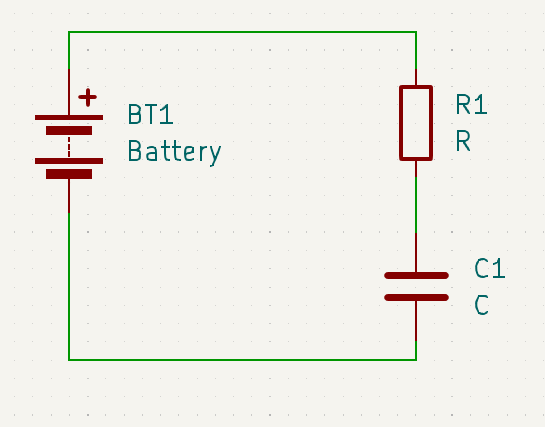

In [18]:
image_path = "testImages/battery_RC_Trial.png"

# Convert image to json
json_data = convUtils.get_json_from_image(image_path)
print(json_data)

In [19]:
import uuid
import json

# create a unique file name for the kicad schematic file

kicad_schematic_path = convUtils.create_kicad_sch_file()


# load json file generated by the llm
with open('result.json', 'r') as f:
    result = json.load(f)
    
print (result)
   


Created file temp_7a1c4a79-faa9-4f1e-b919-6b37c1049f9e.kicad_sch
{'detected_components': [{'lib_id': 'battery', 'x': 15, 'y': 15, 'angle': 0, 'reference': 'BT1', 'value': 'Battery'}, {'lib_id': 'resistor', 'x': 100, 'y': 50, 'angle': 0, 'reference': 'R1', 'value': 'R'}, {'lib_id': 'capacitor', 'x': 100, 'y': 100, 'angle': 0, 'reference': 'C1', 'value': 'C'}], 'component_connections': [{'A_ref': 'BT1', 'A_pin': 1, 'B_ref': 'R1', 'B_pin': 1}, {'A_ref': 'R1', 'A_pin': 2, 'B_ref': 'C1', 'B_pin': 1}]}


# Populate list of components

In [20]:

# Modify the kicad schematic file
convUtils.add_components_to_schematic(path_to_json='result.json', kicad_schematic_path=kicad_schematic_path)
print(kicad_schematic_path)

Modified file temp_7a1c4a79-faa9-4f1e-b919-6b37c1049f9e.kicad_sch
temp_7a1c4a79-faa9-4f1e-b919-6b37c1049f9e.kicad_sch


In [21]:
convUtils.add_wires_to_schematic(path_to_json='result.json', kicad_schematic_path=kicad_schematic_path)

C1
R1
Skipped a wire
BT1
Modified file temp_7a1c4a79-faa9-4f1e-b919-6b37c1049f9e.kicad_sch
